# KNN for Diabetes

**Exercise: Build a KNN model to predict whether a patient has diabetes or not.**

**In this exercise, we will use the dataset: diabetes.csv**

For a quick preview, access this [README link](https://github.com/Mdtr3002/intelsys-lab1/blob/main/readme.md)

## Import library and load data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

dataset = pd.read_csv('diabetes.csv')

## Data exploration

In [4]:
dataset.shape

(768, 9)

In [5]:
dataset.describe(include = 'all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
dataset.tail(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
dataset.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

## Visualization


### Pairplot

/Users/minhtran/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/minhtran/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/Users/minhtran/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/Users/minhtran/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/Users/minhtran/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be 

<Figure size 640x480 with 0 Axes>

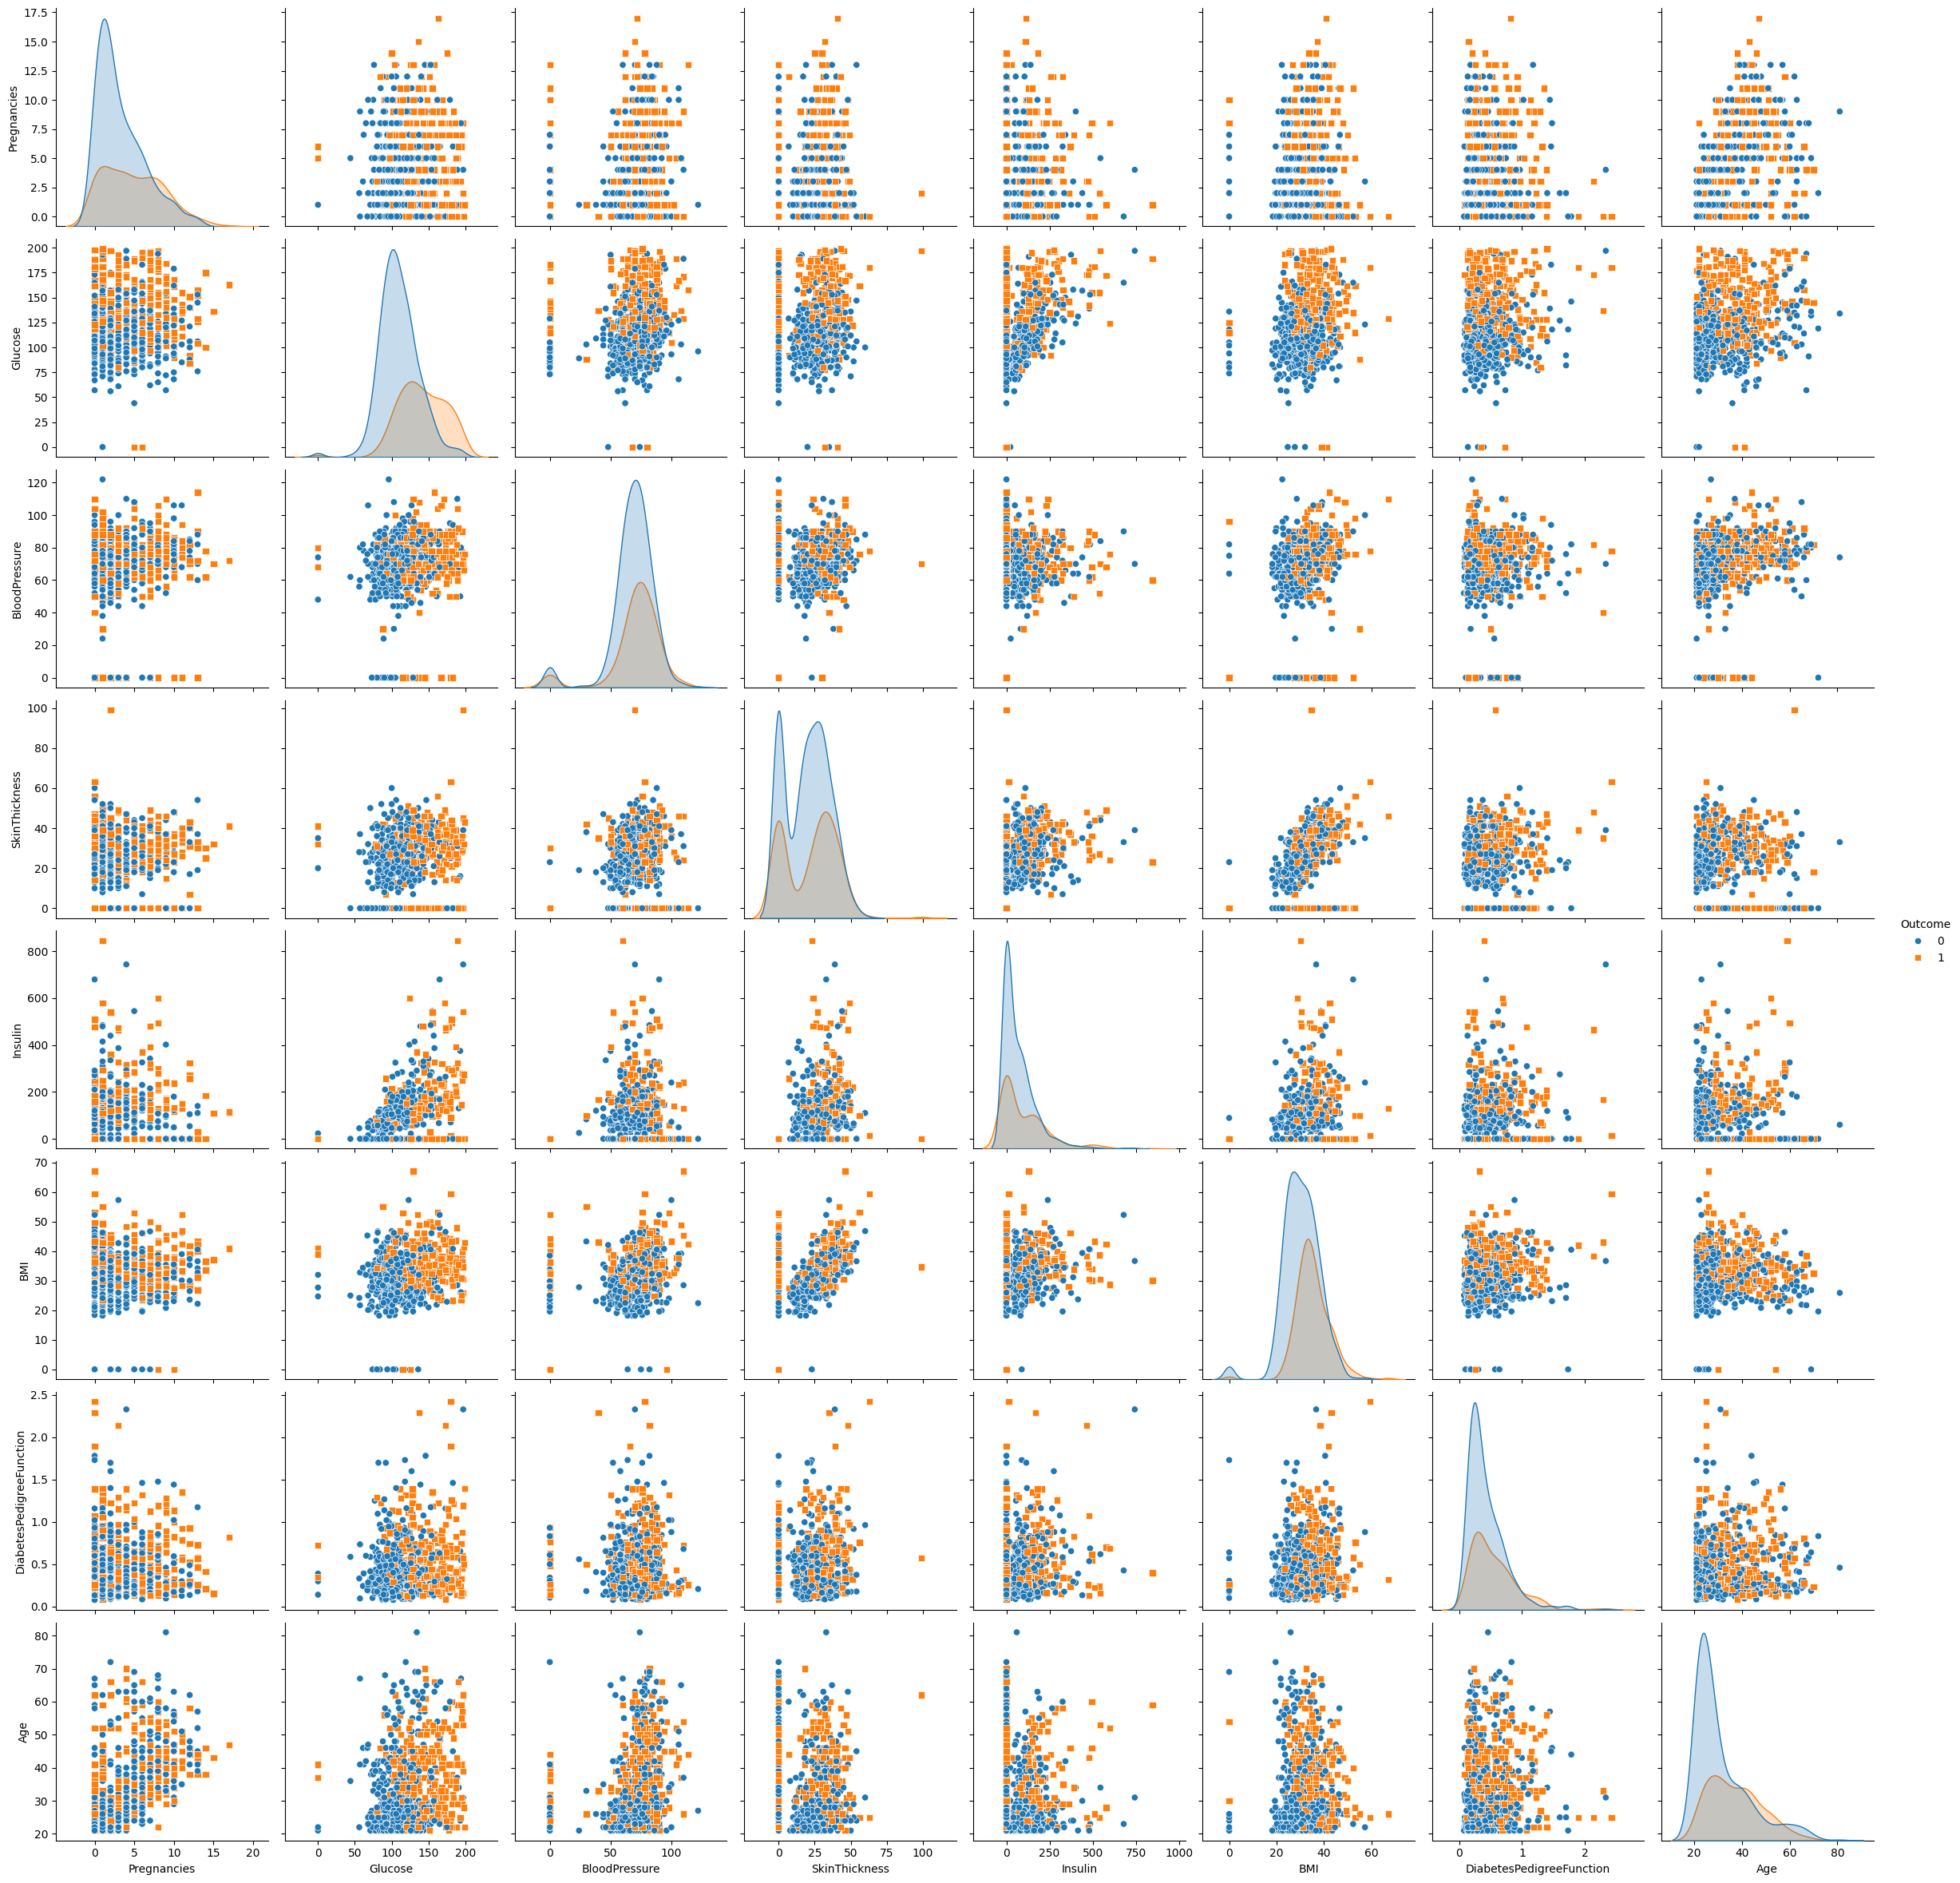

In [10]:
plt.figure()
sns.pairplot(dataset, hue = "Outcome", size=3, markers=["o", "s", "D"])
plt.show()

### Boxplots

<Figure size 640x480 with 0 Axes>

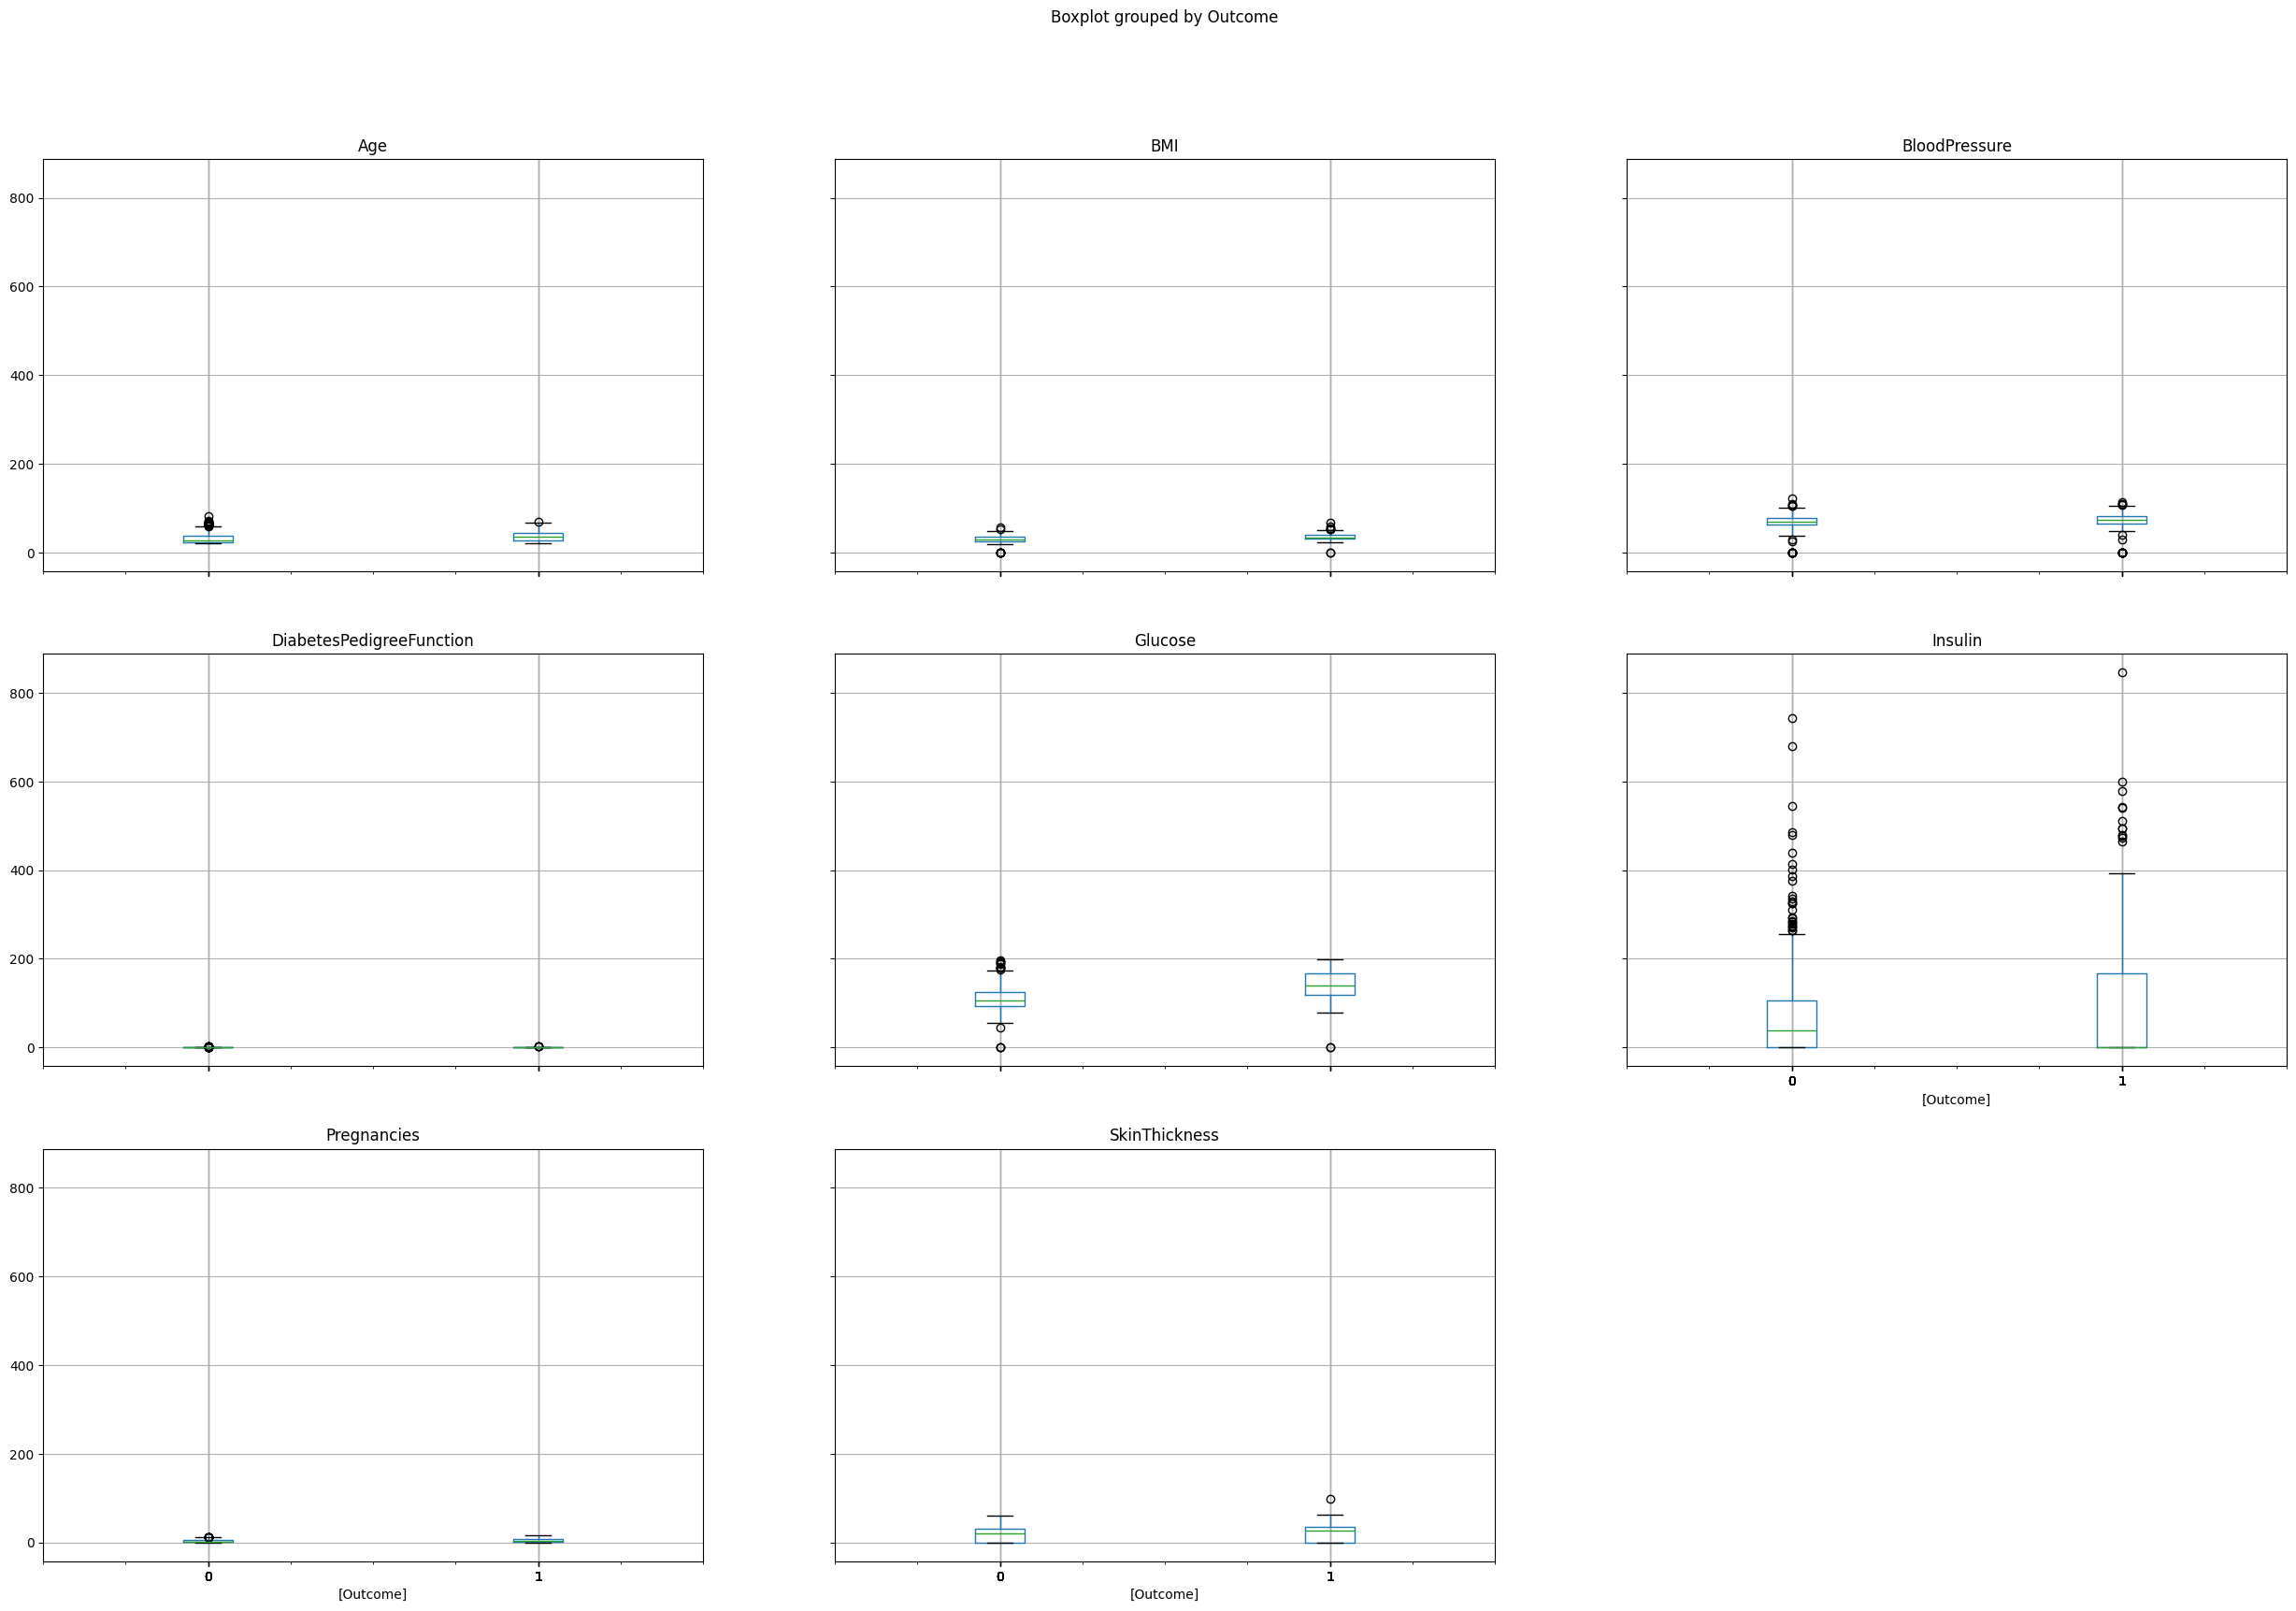

In [11]:
plt.figure()
dataset.boxplot(by='Outcome', figsize=(30,20)) # Detected outliers
plt.show()

## Data preprocessing

### Identify features and labels

In [16]:
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']

X = dataset[feature_cols].values
y = dataset['Outcome'].values

### Encoding (Lable Encoding)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

### Spliting dataset into training set and test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
X_train.shape

(614, 8)

In [20]:
y_train.shape

(614,)

In [21]:
X_test.shape

(154, 8)

In [22]:
y_test.shape

(154,)

## Using KNN for classification

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [25]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

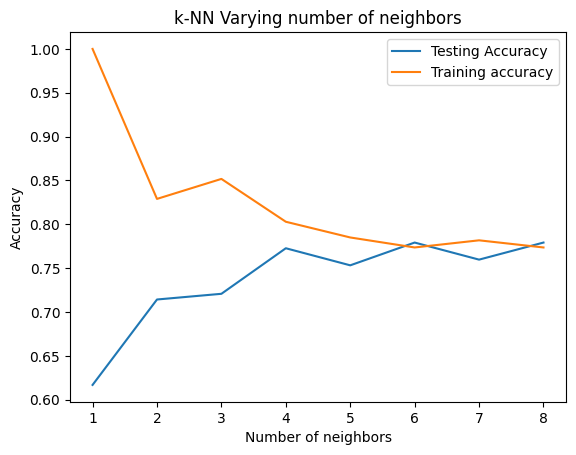

In [26]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

=> From the graph, we choose **k = 6** to build the model

In [27]:
# Create the model (k = 6)
classifier = KNeighborsClassifier(n_neighbors=6)

# Fitting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

### Prediction

In [28]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Evaluating the model for the test set

In [29]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[94, 13],
       [21, 26]])

### Accuracy
**Method 1**

In [30]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 77.92 %.


**Method 2**

In [31]:
acccuracy_byhand = (94+26)/(94+26+13+21)*100
print('Accuracy of our model is equal ' + str(round(acccuracy_byhand, 2)) + ' %.')

Accuracy of our model is equal 77.92 %.


**Method 3**

In [32]:
accuracy_knn = knn.score(X_test, y_test)*100
print('Accuracy of our model is equal ' + str(round(accuracy_knn, 2)) + ' %.')

Accuracy of our model is equal 77.92 %.
